<a href="https://colab.research.google.com/github/Andyqballer/Linear-Regression-And-Gradient-Descent-Home-Work-One/blob/main/HomeOneProblemOneSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and Data Loading:
This section imports necessary libraries and loads the data from 'D3.csv'. It extracts the three explanatory variables (X1, X2, X3) and the dependent variable (Y) as numpy arrays.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('D3.csv')
X1, X2, X3, Y = data['X1'].values, data['X2'].values, data['X3'].values, data['Y'].values


Gradient Descent Function:
This function implements the gradient descent algorithm for linear regression. It takes an input feature X, target variable y, learning rate, maximum iterations, and a convergence tolerance. It returns the optimized parameters (theta), the loss history, and the number of iterations performed.

In [2]:
def gradient_descent(X, y, learning_rate, max_iterations, tolerance=1e-6):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X.reshape(-1, 1)]
    theta = np.zeros((X_b.shape[1], 1))
    y = y.reshape(-1, 1)
    losses = []

    for iteration in range(max_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta_new = theta - learning_rate * gradients

        loss = (1/m) * np.sum(np.square(X_b.dot(theta) - y))
        losses.append(loss)

        if np.all(np.abs(theta_new - theta) < tolerance):
            break

        theta = theta_new

    return theta, losses, iteration + 1

Setup Parameters:
This section sets up the learning rates to be tested, maximum iterations, and creates a list of tuples containing variable names and their corresponding data. The results dictionary will store the outcomes of each regression.

In [3]:
learning_rates = [0.1, 0.05, 0.01]
max_iterations = 1000
variables = [('X1', X1), ('X2', X2), ('X3', X3)]
results = {}

Training Loop:
This loop iterates over each explanatory variable. For each variable, it runs the gradient descent algorithm with different learning rates, stores the results, and plots the loss over iterations.


Training with X1
Learning Rate: 0.1
Model: Y = 5.9279 + -2.0383 * X1
Final Loss: 1.969986
Iterations: 276
Learning Rate: 0.05
Model: Y = 5.9279 + -2.0383 * X1
Final Loss: 1.969986
Iterations: 527
Learning Rate: 0.01
Model: Y = 5.8592 + -2.0116 * X1
Final Loss: 1.971203
Iterations: 1000

Training with X2
Learning Rate: 0.1
Model: Y = 0.7360 + 0.5576 * X2
Final Loss: 7.198732
Iterations: 220
Learning Rate: 0.05
Model: Y = 0.7360 + 0.5576 * X2
Final Loss: 7.198732
Iterations: 412
Learning Rate: 0.01
Model: Y = 0.7308 + 0.5597 * X2
Final Loss: 7.198739
Iterations: 1000

Training with X3
Learning Rate: 0.1
Model: Y = 2.8714 + -0.5205 * X3
Final Loss: 7.258902
Iterations: 256
Learning Rate: 0.05
Model: Y = 2.8714 + -0.5205 * X3
Final Loss: 7.258902
Iterations: 485
Learning Rate: 0.01
Model: Y = 2.8421 + -0.5089 * X3
Final Loss: 7.259128
Iterations: 1000


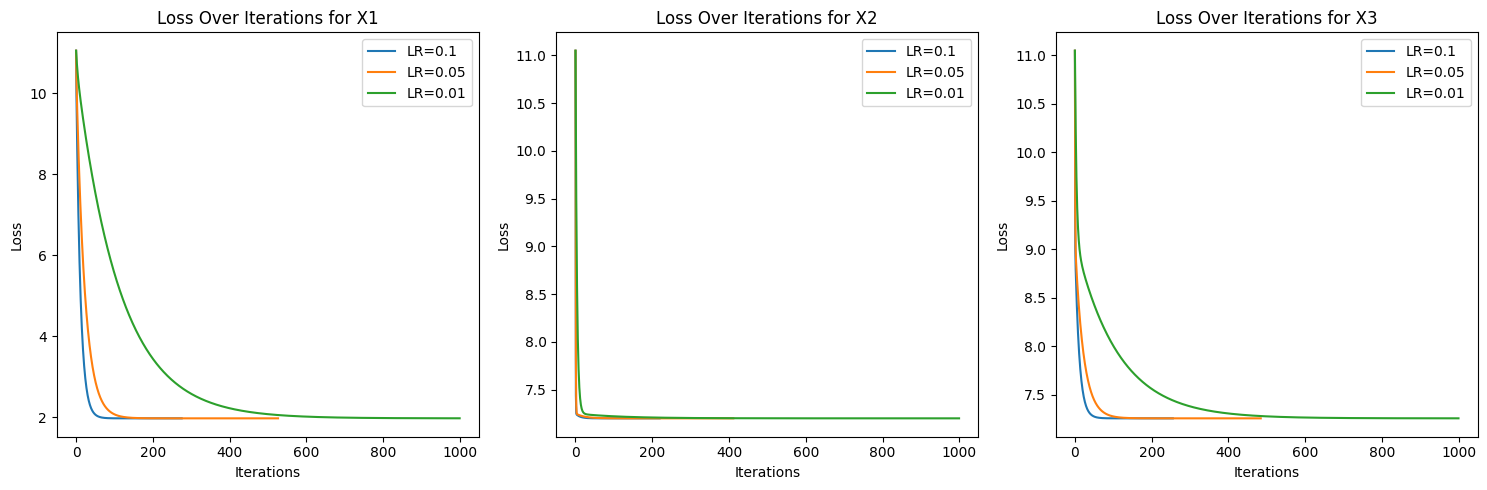

In [4]:
plt.figure(figsize=(15, 5))
for i, (label, X) in enumerate(variables):
    plt.subplot(1, 3, i+1)
    print(f"\nTraining with {label}")
    for lr in learning_rates:
        print(f"Learning Rate: {lr}")
        theta, losses, iterations = gradient_descent(X, Y, learning_rate=lr, max_iterations=max_iterations)
        results[(label, lr)] = (theta, losses, iterations)

        print(f"Model: Y = {theta[0][0]:.4f} + {theta[1][0]:.4f} * {label}")
        print(f"Final Loss: {losses[-1]:.6f}")
        print(f"Iterations: {iterations}")

        plt.plot(losses, label=f"LR={lr}")

    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"Loss Over Iterations for {label}")
    plt.legend()
plt.tight_layout()
plt.savefig('loss_plots.png')
plt.show()

Best Variable Analysis:
This code determines which variable and learning rate combination resulted in the lowest final loss.

In [5]:
final_losses = {key: value[1][-1] for key, value in results.items()}
best_variable = min(final_losses, key=final_losses.get)

Regression Model Plotting:This section creates plots of the final regression models for each variable, showing how well each model fits the data.

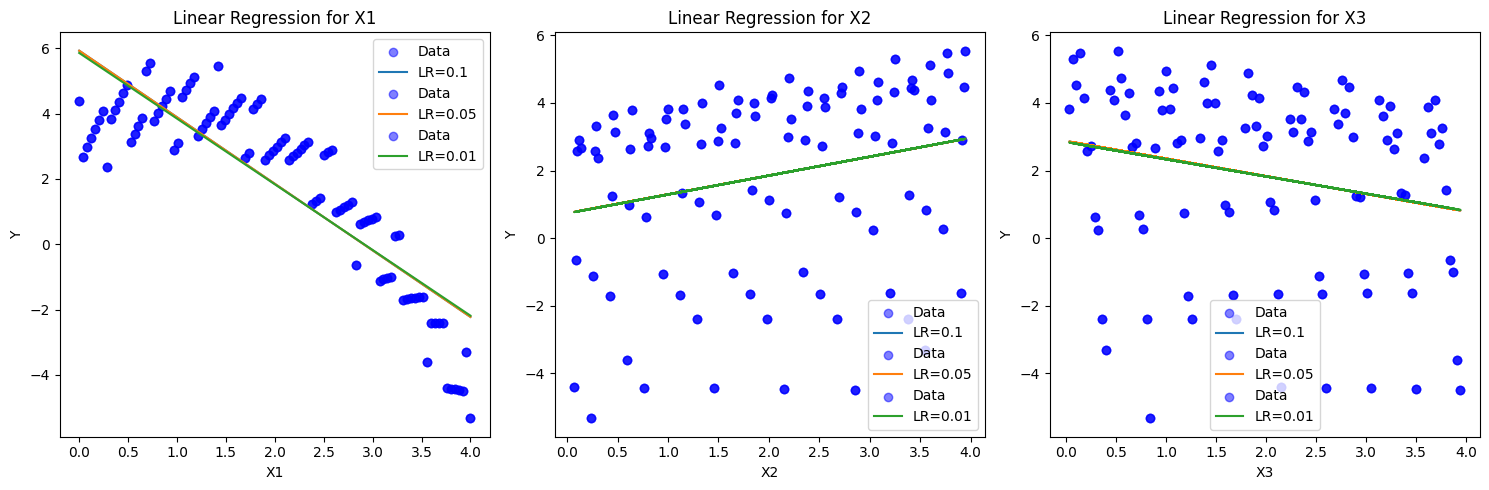

In [6]:
plt.figure(figsize=(15, 5))
for i, (label, X) in enumerate(variables):
    plt.subplot(1, 3, i+1)
    X_b = np.c_[np.ones((len(X), 1)), X.reshape(-1, 1)]
    for lr in learning_rates:
        theta, _, _ = results[(label, lr)]
        plt.scatter(X, Y, color='blue', alpha=0.5, label='Data')
        plt.plot(X, X_b.dot(theta), label=f'LR={lr}')
    plt.xlabel(label)
    plt.ylabel('Y')
    plt.title(f'Linear Regression for {label}')
    plt.legend()
plt.tight_layout()
plt.savefig('regression_plots.png')
plt.show()

Impact Analysis:This part prints out an analysis of how different learning rates affected the final loss and number of iterations for each variable.

In [7]:
print("\nImpact of Learning Rates:")
for label, _ in variables:
    print(f"\nFor {label}:")
    for lr in learning_rates:
        _, losses, iterations = results[(label, lr)]
        print(f"  Learning Rate {lr}:")
        print(f"    Final Loss: {losses[-1]:.6f}")
        print(f"    Iterations: {iterations}")


Impact of Learning Rates:

For X1:
  Learning Rate 0.1:
    Final Loss: 1.969986
    Iterations: 276
  Learning Rate 0.05:
    Final Loss: 1.969986
    Iterations: 527
  Learning Rate 0.01:
    Final Loss: 1.971203
    Iterations: 1000

For X2:
  Learning Rate 0.1:
    Final Loss: 7.198732
    Iterations: 220
  Learning Rate 0.05:
    Final Loss: 7.198732
    Iterations: 412
  Learning Rate 0.01:
    Final Loss: 7.198739
    Iterations: 1000

For X3:
  Learning Rate 0.1:
    Final Loss: 7.258902
    Iterations: 256
  Learning Rate 0.05:
    Final Loss: 7.258902
    Iterations: 485
  Learning Rate 0.01:
    Final Loss: 7.259128
    Iterations: 1000
